In [3]:
install.packages('sf')
install.packages('units')


The downloaded binary packages are in
	/var/folders/6k/x5kk484j4lbgq4xhrs741c400000gn/T//RtmplJsdv0/downloaded_packages

The downloaded binary packages are in
	/var/folders/6k/x5kk484j4lbgq4xhrs741c400000gn/T//RtmplJsdv0/downloaded_packages


In [4]:
library(sf)
library(units)
okcounty <- st_read("ok_counties.shp", quiet = TRUE)
tpoint <- st_read("ok_tornado_point.shp", quiet = TRUE)
tpath <- st_read("ok_tornado_path.shp", quiet = TRUE)

Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE

udunits database from /Library/Frameworks/R.framework/Versions/4.2-arm64/Resources/library/units/share/udunits/udunits2.xml



In [5]:
class(okcounty)
class(tpoint)
class(tpath)


[1] "sf"         "data.frame"

[1] "sf"         "data.frame"

[1] "sf"         "data.frame"

In [6]:
install.packages('ggplot2')
library(ggplot2)


The downloaded binary packages are in
	/var/folders/6k/x5kk484j4lbgq4xhrs741c400000gn/T//RtmplJsdv0/downloaded_packages


ERROR: Error in value[[3L]](cond): Package ‘ggplot2’ version 3.4.3 cannot be unloaded:
 Error in unloadNamespace(package) : namespace ‘ggplot2’ is imported by ‘Hmisc’, ‘choroplethr’, ‘ggmap’ so cannot be unloaded



In [ ]:
ggplot(data=okcounty) + geom_sf()

In [11]:
library(dplyr)

tpoint_16_21 <- tpoint %>%
filter(yr >= 2016 & yr <= 2021) %>%
select(om, yr, date)
tpath_16_21 <- tpath %>%
filter(yr >= 2016 & yr <= 2021) %>%
select(om, yr, date)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




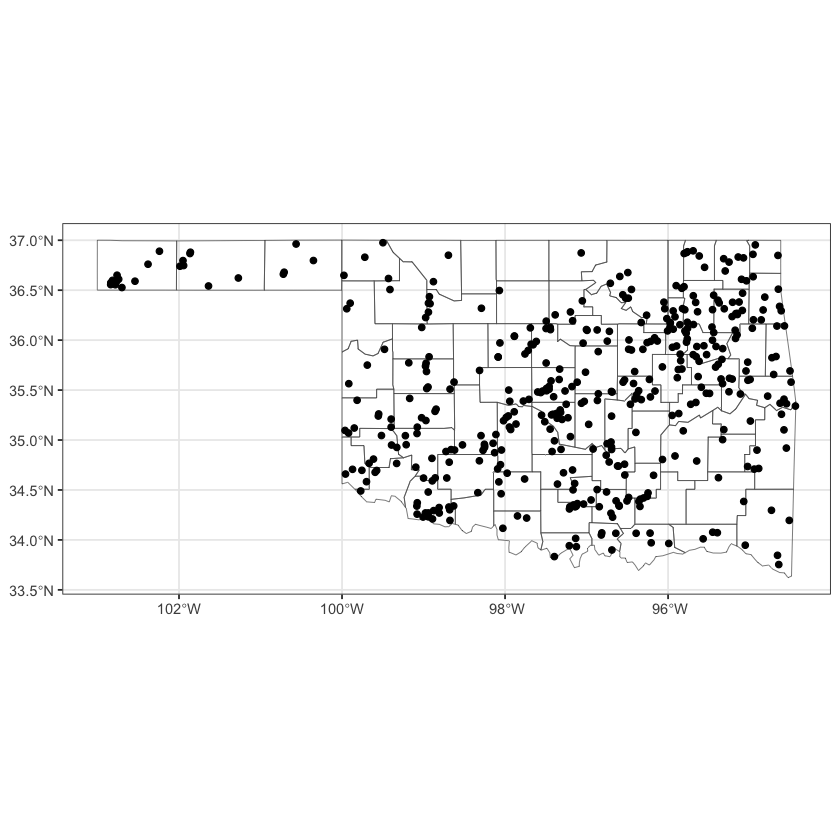

In [12]:
ggplot() +
geom_sf(data = okcounty, fill = NA) +
geom_sf(data = tpoint_16_21) +
theme_bw()

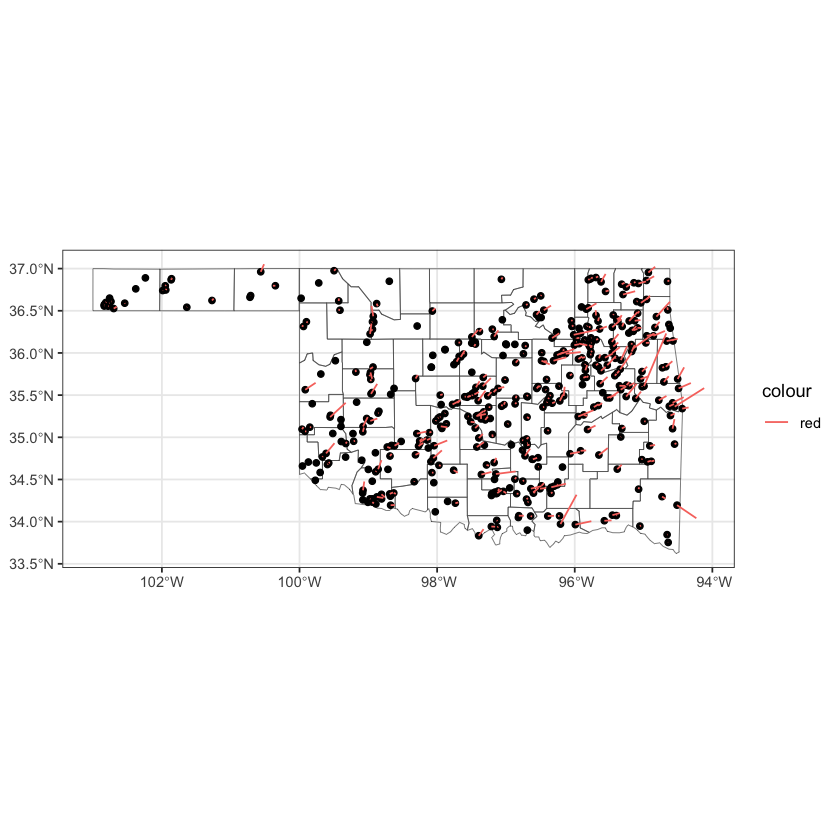

In [13]:
ggplot() +
geom_sf(data = okcounty, fill = NA) +
geom_sf(data = tpoint_16_21) +
geom_sf(data= tpath_16_21, aes(color='red')) +
theme_bw()

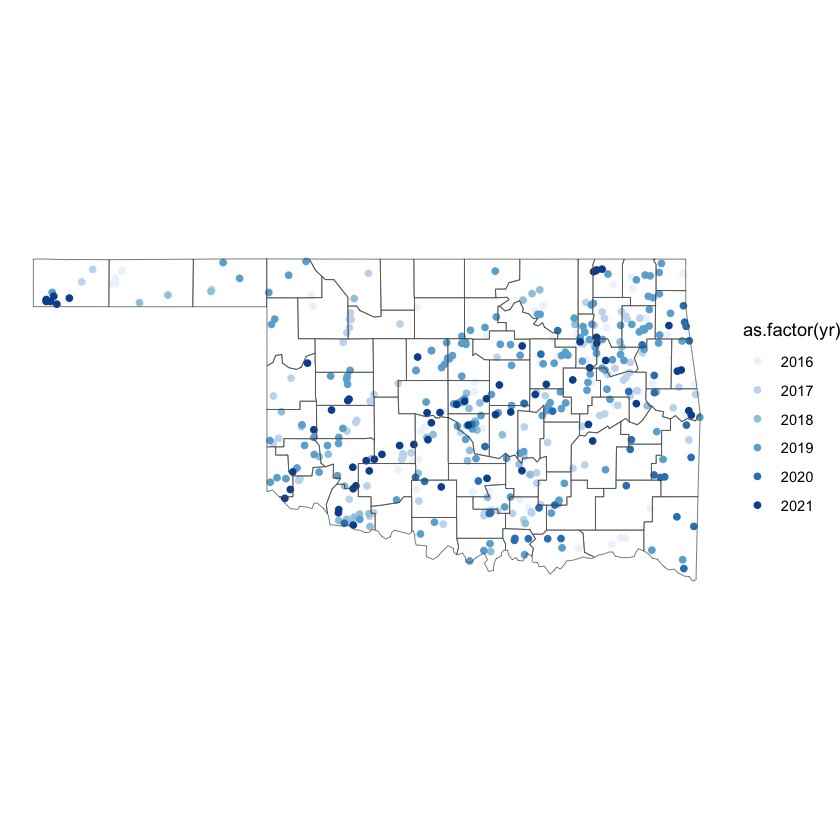

In [16]:
ggplot() +
geom_sf(data = tpoint_16_21,
aes(color = as.factor(yr))) +
geom_sf(data = okcounty, fill = NA) +
scale_color_brewer(palette=1) +
coord_sf(datum = NA) +
theme_void()


In [19]:
countypnt <- st_join(tpoint_16_21, okcounty)

In [20]:
summary(countypnt)
summary(okcounty)
summary(tpoint_16_21)

       om               yr           date             STATEFP         
 Min.   :613662   Min.   :2016   Length:434         Length:434        
 1st Qu.:615243   1st Qu.:2017   Class :character   Class :character  
 Median :617536   Median :2019   Mode  :character   Mode  :character  
 Mean   :617096   Mean   :2018                                        
 3rd Qu.:618399   3rd Qu.:2019                                        
 Max.   :620688   Max.   :2021                                        
   COUNTYFP           COUNTYNS           AFFGEOID            GEOID          
 Length:434         Length:434         Length:434         Length:434        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                         

   STATEFP            COUNTYFP           COUNTYNS           AFFGEOID        
 Length:77          Length:77          Length:77          Length:77         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
    GEOID               NAME               LSAD                    geometry 
 Length:77          Length:77          Length:77          POLYGON      :77  
 Class :character   Class :character   Class :character   epsg:4269    : 0  
 Mode  :character   Mode  :character   Mode  :character   +proj=long...: 0  

       om               yr           date                    geometry  
 Min.   :613662   Min.   :2016   Length:434         POINT        :434  
 1st Qu.:615243   1st Qu.:2017   Class :character   epsg:4269    :  0  
 Median :617536   Median :2019   Mode  :character   +proj=long...:  0  
 Mean   :617096   Mean   :2018                                         
 3rd Qu.:618399   3rd Qu.:2019                                         
 Max.   :620688   Max.   :2021                                         

In [21]:
countypnt <- st_drop_geometry(countypnt)
countysum <- countypnt %>%
group_by(GEOID) %>%
summarize(tcnt = n())

In [22]:
countymap <- okcounty %>%
left_join(countysum, by = "GEOID") %>%
replace(is.na(.), 0) %>%
mutate(area = st_area(okcounty),
tdens = 10^6 * 10^3 * tcnt / area) %>%
drop_units()

In [24]:
summary(countymap)

summary(okcounty)

   STATEFP            COUNTYFP           COUNTYNS           AFFGEOID        
 Length:77          Length:77          Length:77          Length:77         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    GEOID               NAME               LSAD                tcnt       
 Length:77          Length:77          Length:77          Min.   : 0.000  
 Class :character   Class :character   Class :character   1st Qu.: 3.000  
 Mode  :character   Mode  :character   Mode  :character   Median : 5.000  
                                                          Mean   : 5.636  
                                                          3rd Qu.: 8.000  
           

   STATEFP            COUNTYFP           COUNTYNS           AFFGEOID        
 Length:77          Length:77          Length:77          Length:77         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
    GEOID               NAME               LSAD                    geometry 
 Length:77          Length:77          Length:77          POLYGON      :77  
 Class :character   Class :character   Class :character   epsg:4269    : 0  
 Mode  :character   Mode  :character   Mode  :character   +proj=long...: 0  

In [2]:
install.packages('choroplethr')
# Pregunta 10
library(choroplethr)
okcntrd = st_centroid(countymap)
ggplot() +
  geom_sf(data = countymap, aes(fill = tdens)) +
  theme_void()

also installing the dependencies ‘checkmate’, ‘XML’, ‘htmlTable’, ‘Formula’, ‘bitops’, ‘sp’, ‘acs’, ‘Hmisc’, ‘WDI’, ‘ggmap’, ‘RgoogleMaps’, ‘tigris’, ‘tidycensus’





The downloaded binary packages are in
	/var/folders/6k/x5kk484j4lbgq4xhrs741c400000gn/T//RtmplJsdv0/downloaded_packages


Loading required package: acs

Loading required package: stringr

Loading required package: XML


Attaching package: ‘acs’


The following object is masked from ‘package:base’:

    apply


The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, were retired in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.



ERROR: Error in st_centroid(countymap): no se pudo encontrar la función "st_centroid"
